In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign


In [5]:
ls data

signnames.csv  test.p  train.p


In [6]:
train = pd.read_pickle('data/train.p')
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [7]:
X_train, y_train = train['features'], train['labels']
X_train.shape, y_train.shape

((34799, 32, 32, 3), (34799,))

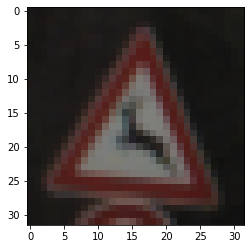

In [8]:
plt.imshow( X_train[800] )

In [9]:
signs = pd.read_csv('data/signnames.csv')
signs.head()

,a,b
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [12]:
signs.to_dict()

{'a': {0: 0,
  1: 1,
  2: 2,
  3: 3,
  4: 4,
  5: 5,
  6: 6,
  7: 7,
  8: 8,
  9: 9,
  10: 10,
  11: 11,
  12: 12,
  13: 13,
  14: 14,
  15: 15,
  16: 16,
  17: 17,
  18: 18,
  19: 19,
  20: 20,
  21: 21,
  22: 22,
  23: 23,
  24: 24,
  25: 25,
  26: 26,
  27: 27,
  28: 28,
  29: 29,
  30: 30,
  31: 31,
  32: 32,
  33: 33,
  34: 34,
  35: 35,
  36: 36,
  37: 37,
  38: 38,
  39: 39,
  40: 40,
  41: 41,
  42: 42},
 'b': {0: 'Speed limit (20km/h)',
  1: 'Speed limit (30km/h)',
  2: 'Speed limit (50km/h)',
  3: 'Speed limit (60km/h)',
  4: 'Speed limit (70km/h)',
  5: 'Speed limit (80km/h)',
  6: 'End of speed limit (80km/h)',
  7: 'Speed limit (100km/h)',
  8: 'Speed limit (120km/h)',
  9: 'No passing',
  10: 'No passing for vehicles over 3.5 metric tons',
  11: 'Right-of-way at the next intersection',
  12: 'Priority road',
  13: 'Yield',
  14: 'Stop',
  15: 'No vehicles',
  16: 'Vehicles over 3.5 metric tons prohibited',
  17: 'No entry',
  18: 'General caution',
  19: 'Dangerous curve 

In [13]:
signs.to_dict()['b']

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

In [15]:
dict_signs = signs.to_dict()['b']
dict_signs[23]

'Slippery road'

In [28]:
for i in dict_signs.keys():
  plt.figure(figsize=(15, 5))
  for j in range(9):
    plt.subplot('19{0}'.format(j+1))
    plt.imshow( X_train[ y_train == i ][j] )
    plt.axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [30]:
Counter(y_train).most_common()

[(2, 2010),
 (1, 1980),
 (13, 1920),
 (12, 1890),
 (38, 1860),
 (10, 1800),
 (4, 1770),
 (5, 1650),
 (25, 1350),
 (9, 1320),
 (7, 1290),
 (3, 1260),
 (8, 1260),
 (11, 1170),
 (35, 1080),
 (18, 1080),
 (17, 990),
 (31, 690),
 (14, 690),
 (33, 599),
 (26, 540),
 (15, 540),
 (28, 480),
 (23, 450),
 (30, 390),
 (16, 360),
 (34, 360),
 (6, 360),
 (36, 330),
 (22, 330),
 (40, 300),
 (20, 300),
 (39, 270),
 (21, 270),
 (29, 240),
 (24, 240),
 (41, 210),
 (42, 210),
 (32, 210),
 (27, 210),
 (37, 180),
 (19, 180),
 (0, 180)]

In [34]:
id_labels[ 10 ]

7

In [36]:
dict_signs[ id_labels[ 10 ] ]

'Speed limit (100km/h)'

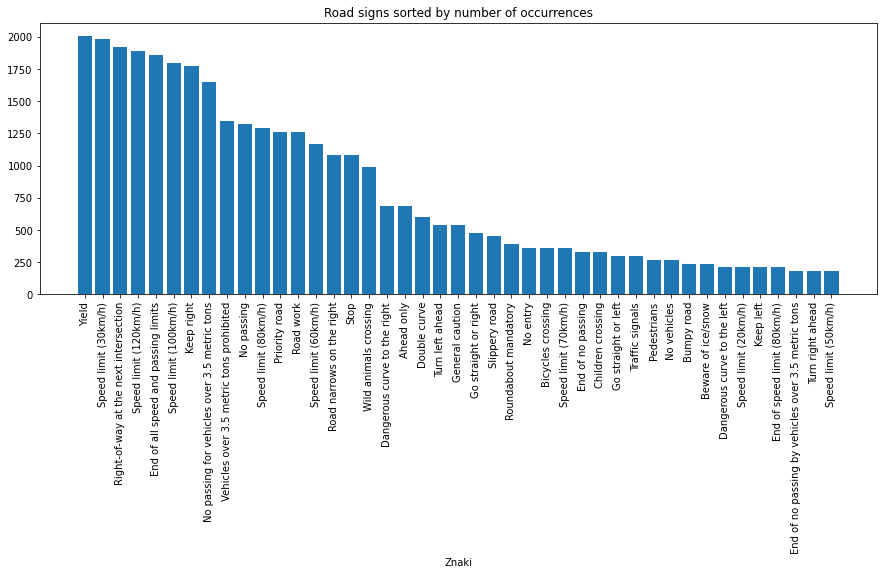

In [41]:
cnt = Counter(y_train).most_common()

id_labels, cnt_labels = zip(*cnt)
ids = range(len(id_labels))

plt.figure(figsize=(15,5))
plt.bar(ids, cnt_labels)

plt.xlabel('Znaki')
labels = [dict_signs[ id_labels[id_] ] for id_ in id_labels]
plt.xticks(ids, labels, rotation='vertical')

plt.title('Road signs sorted by number of occurrences')
plt.show()